In [ ]:
"""
비교군 : k-Nearest Neighbors
"""
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive
from sklearn.model_selection import train_test_split

from sklearn import preprocessing
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the Dataset
deal = pd.read_csv('/content/drive/MyDrive/데청캠_인바디/ZohoCRM_Dataset/deal_closed_prediction_data.csv')

print(deal)

X = deal[['Year', 'Month', 'Day', 'LeadSource', 'Territory', 'Industry']]
y = deal[['Stage']]

print(y.value_counts())

# StandarScaler 적용
# scaler = StandardScaler()
# scaler.fit(X)
# X_scaled = scaler.transform(X)

# Min-Max Scaling
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(X) 
X_scaled = scaler.transform(X) 

      Year  Month  Day  LeadSource    Territory       Industry  Stage
0     2017      2    7    0.000458    50.000000  132320.620804      0
1     2017      2    7    0.000458    50.000000  132320.620804      0
2     2017      2    7    0.000458  3430.305858  132320.620804      1
3     2017      2    7    0.000458  1394.639984   61963.087644      1
4     2017      2   14    0.000458    50.000000  132320.620804      1
...    ...    ...  ...         ...          ...            ...    ...
2136  2021      7   24   32.692308   645.756033    1430.564418      0
2137  2021      7   26   25.000000   645.756033    1430.564418      0
2138  2021      7   26   25.000000  1014.059096    2727.317659      0
2139  2021      7   26   40.384615   645.756033    2727.317659      0
2140  2021      7   26   32.692308   645.756033    1073.495543      0

[2141 rows x 7 columns]
Stage
0        1212
1         929
dtype: int64


In [ ]:
# Split the Dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled , y, test_size=0.3, random_state=1)

print(X_train.shape)
print(y_test.shape)

(1498, 6)
(643, 1)


In [ ]:
# Training and Predictions
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=7)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Evaluating the Algorithm - Best Practice 0.8149300155520995
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[328  38]
 [ 84 193]]
              precision    recall  f1-score   support

           0       0.80      0.90      0.84       366
           1       0.84      0.70      0.76       277

    accuracy                           0.81       643
   macro avg       0.82      0.80      0.80       643
weighted avg       0.81      0.81      0.81       643



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was

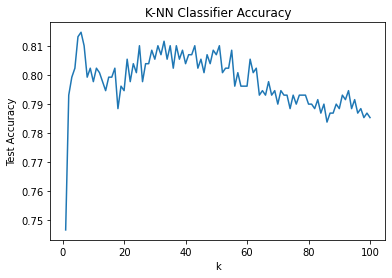

In [ ]:
# Plot the Test Results
import matplotlib.pyplot as plt
k_list = range(1,101)
accuracies = []
for k in k_list:
  classifier = KNeighborsClassifier(n_neighbors = k)
  classifier.fit(X_train, y_train)
  accuracies.append(classifier.score(X_test, y_test))
plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Test Accuracy")
plt.title("K-NN Classifier Accuracy")
plt.show()


In [ ]:
print(max(accuracies))

0.8149300155520995
